<a href="https://colab.research.google.com/github/MuhammadAlikhawar/Data-Science-with-ALI/blob/main/AUTOENCODER(DLSS_ON_IMAGES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array 
import cv2


In [ ]:
#now we will make input images by lowering resolution without changing the size
import cv2
def pixalate_image(image, scale_percent = 5):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
     # scale back to original size
    width = int(small_image.shape[1] * 100 / scale_percent)
    height = int(small_image.shape[0] * 100 / scale_percent)
    dim = (width, height)
    low_res_image = cv2.resize(small_image, dim, interpolation =  cv2.INTER_AREA)
    return low_res_image

In [ ]:
high_res_training = "/content/drive/MyDrive/high_res_training"
low_res_training = "/content/drive/MyDrive/low_res_training"
high_res_testing = "/content/drive/MyDrive/high_res_testing"
low_res_testing="/content/drive/MyDrive/low_res_testing"

In [ ]:
# high_res_training = "high_res_training"
# low_res_training = "low_res_training"
# high_res_testing = "high_res_testing"
# low_res_testing="low_res_testing"


for file in os.listdir(high_res_training):
    print(os.path.join(high_res_training,file))
    img = cv2.imread(os.path.join(high_res_training,file))
    print(img.shape)
    cv2.imwrite(os.path.join(low_res_training,file),pixalate_image(img))

/content/drive/MyDrive/high_res_training/100.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/1.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/10.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/101.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/102.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/103.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/104.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/107.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/105.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/106.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/108.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/109.jpg
(799, 1200, 3)
/content/drive/MyDrive/high_res_training/110.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/11.jpg
(799, 1200, 3)
/content/drive/MyDrive/high_res_training/111.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_training/113

In [ ]:
high_res_img_training =[]
for filename in os.listdir(high_res_training):
    if filename.endswith(".jpg"):
        img = image.load_img(os.path.join(os.getcwd(), os.path.join(high_res_training, filename)), target_size=(256,256))
        high_res_img_training.append(image.img_to_array(img))
high_res_img_training= np.array(high_res_img_training)
high_res_img_training

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [ ]:
low_res_img_training =[]
for filename in os.listdir(low_res_training):
    if filename.endswith(".jpg"):
        img = image.load_img(os.path.join(os.getcwd(), os.path.join(low_res_training, filename)), target_size=(256,256))
        low_res_img_training.append(image.img_to_array(img))
low_res_img_training= np.array(high_res_img_training)
low_res_img_training

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [ ]:
print("high_res_img_training",high_res_img_training.shape)

high_res_img_training (495, 256, 256, 3)


In [ ]:
print("low_res_img_training",low_res_img_training.shape)

low_res_img_training (495, 256, 256, 3)


In [ ]:

# high_res_training = "high_res_training"
# low_res_training = "low_res_training"
# high_res_testing = "high_res_testing"
# low_res_testing="low_res_testing"


for file in os.listdir(high_res_testing):
    print(os.path.join(high_res_testing,file))
    img = cv2.imread(os.path.join(high_res_testing,file))
    print(img.shape)
    cv2.imwrite(os.path.join(low_res_testing,file),pixalate_image(img))

/content/drive/MyDrive/high_res_testing/1153.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1155.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1160.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1159.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1157.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1158.jpg
(798, 1200, 3)
/content/drive/MyDrive/high_res_testing/1154.jpg
(797, 1200, 3)
/content/drive/MyDrive/high_res_testing/1156.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1151.jpg
(800, 1198, 3)
/content/drive/MyDrive/high_res_testing/1152.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1163.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1181.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1170.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1166.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/1173.jpg
(800, 1200, 3)
/content/drive/MyDrive/high_res_testing/

In [ ]:
high_res_img_testing =[]
for filename in os.listdir(high_res_testing):
    if filename.endswith(".jpg"):
        img = image.load_img(os.path.join(os.getcwd(), os.path.join(high_res_testing, filename)), target_size=(256,256))
        high_res_img_testing.append(image.img_to_array(img))
high_res_img_testing= np.array(high_res_img_testing)
high_res_img_testing

array([[[[250., 249., 247.],
         [250., 249., 247.],
         [250., 249., 247.],
         ...,
         [251., 250., 248.],
         [251., 250., 248.],
         [250., 249., 247.]],

        [[250., 249., 247.],
         [250., 249., 247.],
         [250., 249., 247.],
         ...,
         [251., 250., 248.],
         [251., 250., 248.],
         [250., 249., 247.]],

        [[250., 249., 247.],
         [250., 249., 247.],
         [250., 249., 247.],
         ...,
         [251., 250., 248.],
         [250., 249., 247.],
         [249., 248., 246.]],

        ...,

        [[135., 121., 112.],
         [237., 209., 198.],
         [227., 186., 164.],
         ...,
         [188., 155.,  86.],
         [193., 152., 100.],
         [136., 106.,  52.]],

        [[ 63.,  39.,  29.],
         [130., 121., 104.],
         [235., 203., 178.],
         ...,
         [224., 188., 104.],
         [172., 128.,  63.],
         [128.,  93.,  51.]],

        [[ 80.,  67.,  50.],
       

In [ ]:
low_res_img_testing =[]
for filename in os.listdir(low_res_testing):
    if filename.endswith(".jpg"):
        img = image.load_img(os.path.join(os.getcwd(), os.path.join(low_res_testing, filename)), target_size=(256,256))
        low_res_img_testing.append(image.img_to_array(img))
low_res_img_testing= np.array(low_res_img_testing)
low_res_img_testing

array([[[[249., 248., 246.],
         [249., 248., 246.],
         [249., 248., 246.],
         ...,
         [250., 249., 247.],
         [250., 249., 247.],
         [250., 249., 247.]],

        [[249., 248., 246.],
         [249., 248., 246.],
         [249., 248., 246.],
         ...,
         [250., 249., 247.],
         [250., 249., 247.],
         [250., 249., 247.]],

        [[249., 248., 246.],
         [249., 248., 246.],
         [249., 248., 246.],
         ...,
         [250., 249., 247.],
         [250., 249., 247.],
         [250., 249., 247.]],

        ...,

        [[169., 144., 114.],
         [169., 144., 114.],
         [169., 144., 114.],
         ...,
         [185., 146.,  87.],
         [185., 146.,  87.],
         [185., 146.,  87.]],

        [[169., 144., 114.],
         [169., 144., 114.],
         [169., 144., 114.],
         ...,
         [185., 146.,  87.],
         [185., 146.,  87.],
         [185., 146.,  87.]],

        [[169., 144., 114.],
       

In [ ]:
print("low_res_img_testing",low_res_img_testing.shape)

low_res_img_testing (101, 256, 256, 3)


In [ ]:
def show_test_data(X,n=5,title=""):
    plt.figure(figsize=(30,40))
    for i in range(n):
        ax=plt.subplot(3,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=15)

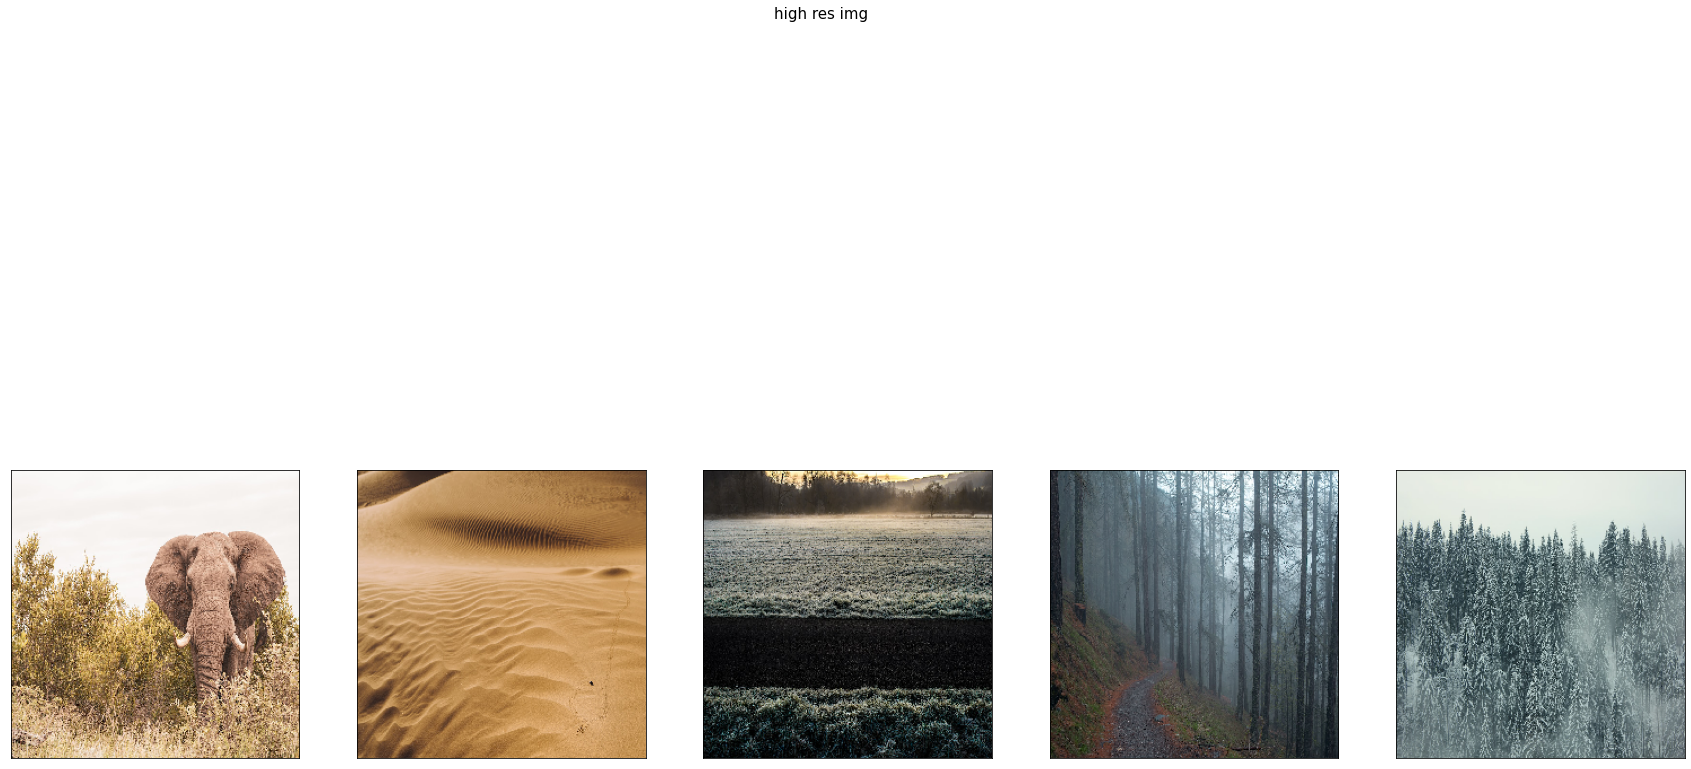

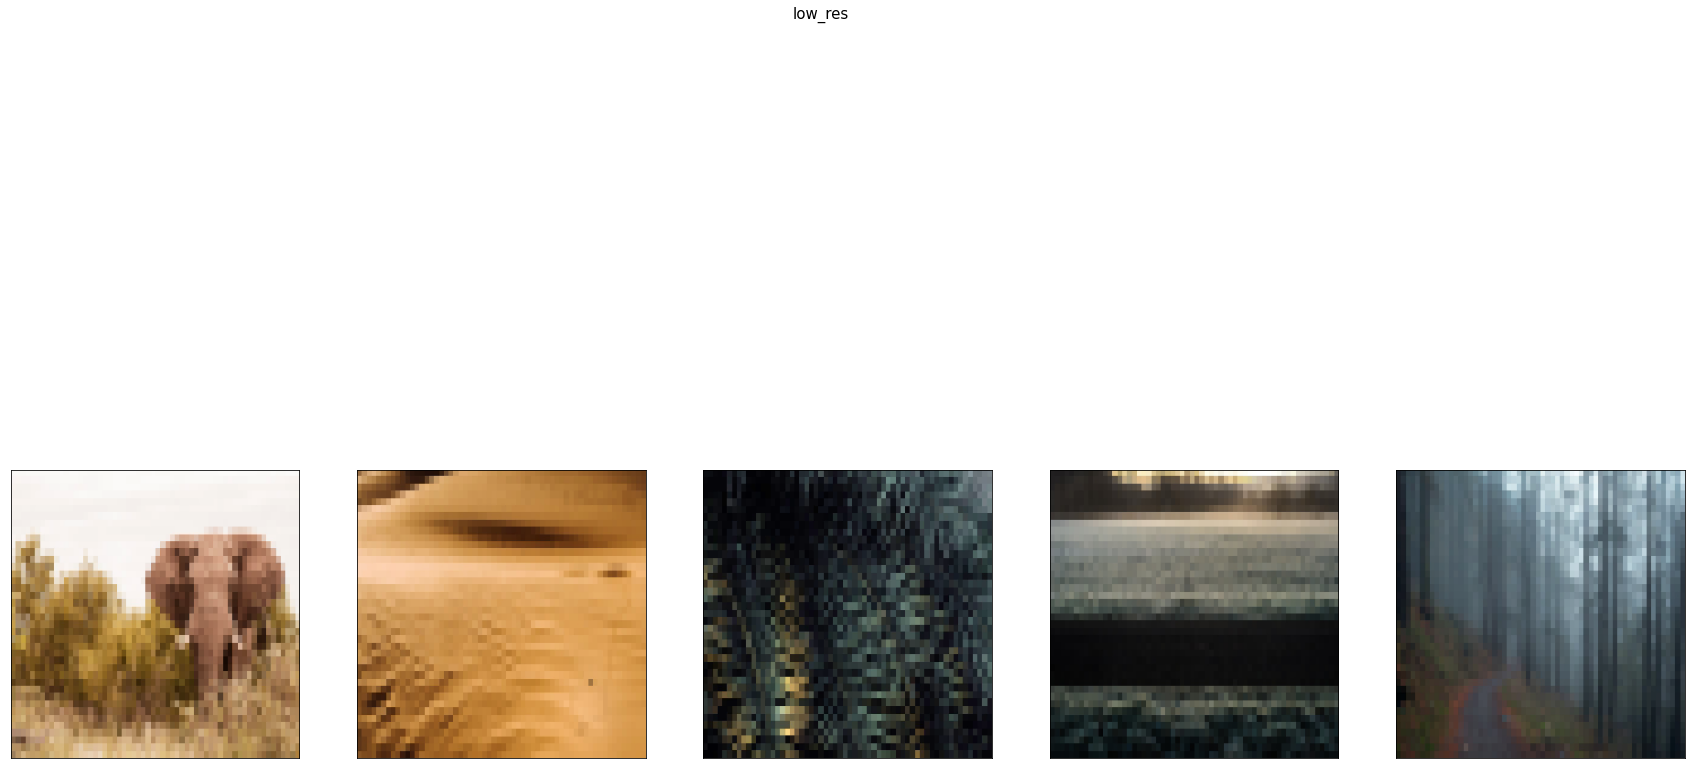

In [ ]:
show_test_data(high_res_img_testing,title="high res img")
show_test_data(low_res_img_testing,title="low_res")



In [ ]:
input_layer = Input(shape=(256,256,3),name="INPUT")
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_layer) 
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x = MaxPooling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)


code_layer = MaxPooling2D((2, 2), name="CODE")(x)

# x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(code_layer)
# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(code_layer)
# x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [ ]:
autoencoder_AE = Model(input_layer,output_layer)
autoencoder_AE.compile(optimizer='Adam', loss='mse',metrics=["accuracy"])
autoencoder_AE.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 64)       3692

In [ ]:
from tensorflow.keras.utils import plot_model


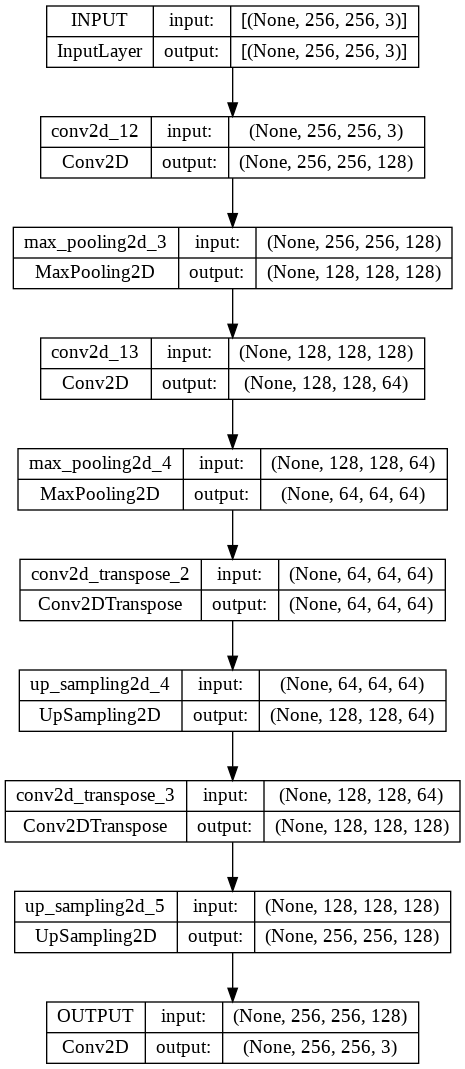

In [ ]:
plot_model(autoencoder_AE,show_shapes=True,show_layer_names=True,rankdir="TB",expand_nested=True)

In [ ]:
# import numpy as np
# import cv2
# import glob
# import tensorflow as tf
# from tensorflow.keras import Model, Input, regularizers
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split 
# import pickle

***THIS CNN MODEL GIVE YOU BEST RESULT***

In [ ]:
# input_layer = Input(shape=(256, 256, 3))  
    
# #encoding architecture
# x1 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(input_layer)
# x2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x1)
# x3 = MaxPool2D(padding='same')(x2)
# x4 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3)
# x5 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4)
# x6 = MaxPool2D(padding='same')(x5)
# encoded = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x6)
# #encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# # decoding architecture
# x7 = UpSampling2D()(encoded)
# x8 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x7)
# x9 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x8)
# x10 = Add()([x5, x9])
# x11 = UpSampling2D()(x10)
# x12 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x11)
# x13 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x12)
# x14 = Add()([x2, x13])
# # x3 = UpSampling2D((2, 2))(x3)
# # x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
# # x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
# output_layer = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-10))(x14)
# # autoencoder = Model(Input_img, decoded)
# # autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# autoencoder_AE = Model(input_layer,output_layer)
# autoencoder_AE.compile(optimizer='Adam', loss='mse',metrics=["accuracy"])
# autoencoder_AE.summary()

In [ ]:
history= autoencoder_AE.fit(low_res_img_training,high_res_img_training,
                epochs=1500,
                batch_size=20,
                shuffle=True,
                validation_data=(low_res_img_testing,high_res_img_testing))

Epoch 1/1500
25/25 [==============================] - 6s 238ms/step - loss: 253.2855 - accuracy: 0.8341 - val_loss: 5942.3999 - val_accuracy: 0.6530
Epoch 2/1500
25/25 [==============================] - 6s 238ms/step - loss: 258.8903 - accuracy: 0.8087 - val_loss: 5991.3892 - val_accuracy: 0.6556
Epoch 3/1500
25/25 [==============================] - 6s 244ms/step - loss: 250.8077 - accuracy: 0.8165 - val_loss: 5906.1357 - val_accuracy: 0.6480
Epoch 4/1500
25/25 [==============================] - 6s 240ms/step - loss: 261.6368 - accuracy: 0.8137 - val_loss: 6060.3071 - val_accuracy: 0.6297
Epoch 5/1500
25/25 [==============================] - 6s 240ms/step - loss: 258.9983 - accuracy: 0.8067 - val_loss: 5993.6938 - val_accuracy: 0.6406
Epoch 6/1500
25/25 [==============================] - 6s 240ms/step - loss: 253.6595 - accuracy: 0.7907 - val_loss: 5957.3608 - val_accuracy: 0.6490
Epoch 7/1500
25/25 [==============================] - 6s 241ms/step - loss: 244.3784 - accuracy: 0.8206 - 

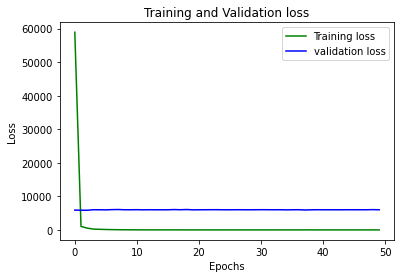

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = list(np.arange(0,50, 1))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

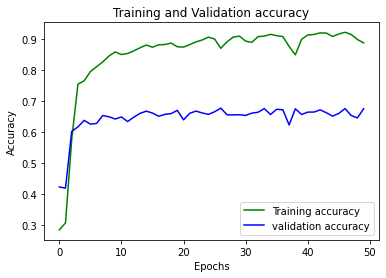

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = list(np.arange(0,50, 1))
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
autoencoder_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464 

In [ ]:
results =autoencoder_AE.evaluate(low_res_img_training,high_res_img_training)
print('train_loss,train_accuracy',results)

16/16 [==============================] - 30s 807ms/step - loss: 4.6768 - accuracy: 0.9394
train_loss,train_accuracy [4.676774978637695, 0.9394364953041077]


In [ ]:
results =autoencoder_AE.evaluate(low_res_img_testing,high_res_img_testing)
print('val_loss,val_accuracy', results)

4/4 [==============================] - 6s 2s/step - loss: 6006.6177 - accuracy: 0.6750
val_loss,val_accuracy [6006.61767578125, 0.6750378012657166]


In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder_AE.predict(low_res_img_testing)
decoded_imgs = autoencoder_AE.predict(encoded_imgs)

4/4 [==============================] - 3s 827ms/step


In [ ]:
def show_data(X,n=5,title=""):
    plt.figure(figsize=(20,30))
    for i in range(n):
        ax=plt.subplot(3,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=15)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 
import keras.utils as image


In [ ]:
show_test_data(high_res_img_testing,title="original test image with good resolution ")
show_data(low_res_img_testing,title="low resolution encoded img")
show_data(decoded_imgs,title="decoded image,reconstructed img")